# Simulación de Movimiento Browniano

## Simulación a partir de una variable gaussiana

Referencia: http://web.mit.edu/8.334/www/grades/projects/projects17/OscarMickelin/brownian.html

In [1]:
import random
import matplotlib.pyplot as plt 
import numpy as np

def brownianMotion(timePoints):
    brownianTrajectory = [0]
    for t in range(len(timePoints)-1):
        randomNumber = random.gauss(0, timePoints[t+1]-timePoints[t])
        brownianTrajectory.append(brownianTrajectory[t] + randomNumber)
    return brownianTrajectory

def graph_bm(numPoints):
    x = np.linspace(0,1,numPoints)
    y = brownianMotion(x)
    plt.plot(x,y)
    plt.xlabel(f'Tiempo con {numPoints} puntos')
    plt.ylabel('Movimiento Browniano')
    plt.show()

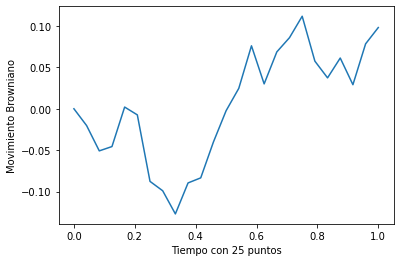

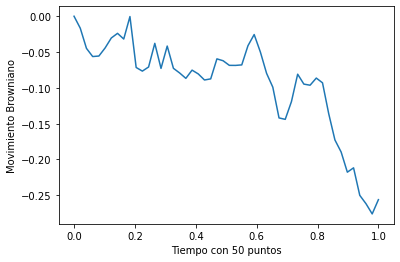

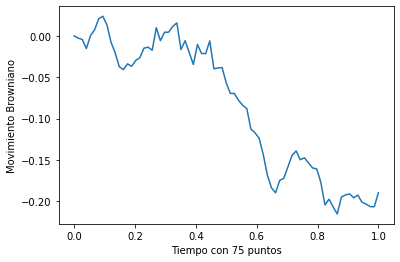

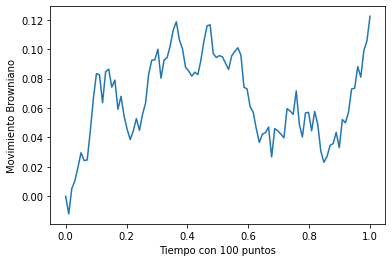

In [2]:
for numPoints in range(25,101,25):
    graph_bm(numPoints)

    

In [ ]:
graph_bm(300)

## Simulación a partir de una caminata aleatoria

El movimiento browniano es una caminata aleatoria con un escalamiento en $x$ y en $y$. Concretamente, el dominio de $x$ lo normalizamos para que tenga valores entre $[0,1]$ mientras que $y$ lo rescalamos por medio de $\sqrt{n}$ donde $n$ es la cantidad de puntos de la caminata aleatoria.

In [3]:
def caminata(M, p):
    valores_caminata = [M]
    valores_x = [0]
    i = 0
    m = M
    while m > 0 and m < 2*M:
        n = random.randint(0, 1)
        if n <= p: m += 1
        else: m -= 1
        i += 1
        valores_caminata.append(m)
        valores_x.append(i)
    return valores_caminata,valores_x

def rescale_rw(Y, X):
    Y = np.array(Y)
    X = np.array(X)
    n = len(Y)
    return (Y/np.sqrt(n), X/n)

def graph_rw(Y, X, xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(X, Y)
    plt.show()

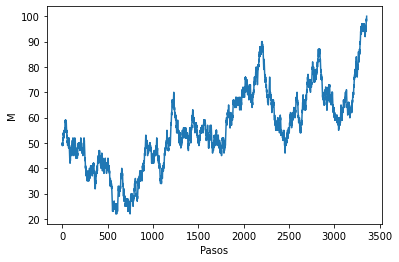

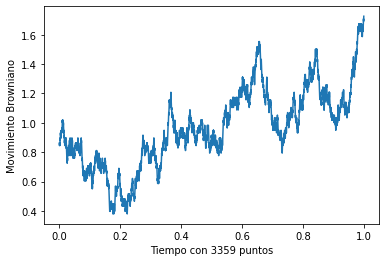

In [4]:
caminata, X = caminata(50, 0.5)
bmY, bmX = rescale_rw(caminata, X)
graph_rw(caminata, X, 'Pasos', 'M')
graph_rw(bmY, bmX, f'Tiempo con {len(bmY)} puntos', 'Movimiento Browniano')